# Decision Tree

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

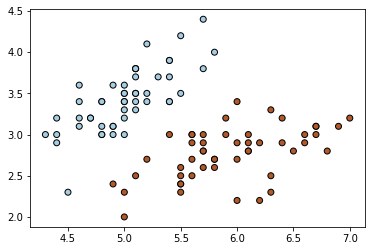

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features.
Y = iris.target

X = X[:100]
Y = Y[:100]
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=1).fit(X, Y)


In [6]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

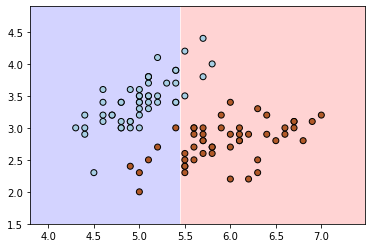

In [64]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
cs = plt.contourf(xx, yy, Z, cmap = "bwr", alpha = 0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.savefig("tree4.pdf", bbox_inches='tight')

[Text(167.4, 163.07999999999998, 'X[0] <= 5.45\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(83.7, 54.360000000000014, 'gini = 0.208\nsamples = 51\nvalue = [45, 6]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.183\nsamples = 49\nvalue = [5, 44]')]

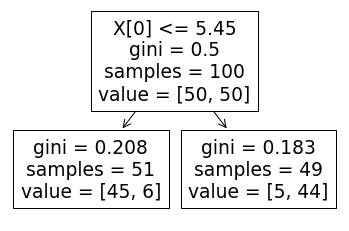

In [68]:
plot_tree(clf)
# plt.savefig('tree.pdf')


In [48]:
from sklearn import tree
import pydotplus
import collections
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)


In [52]:
colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

InvocationException: GraphViz's executables not found